In [21]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [23]:
import shutil
shutil.unpack_archive(f"chap3/dow+jones+index.zip")

In [25]:
# 7章総合問題
# 1
data = pd.read_csv("chap3/dow_jones_index.data")
print(data.head())

   quarter stock       date    open    high     low   close     volume  \
0        1    AA   1/7/2011  $15.82  $16.72  $15.78  $16.42  239655616   
1        1    AA  1/14/2011  $16.71  $16.71  $15.64  $15.97  242963398   
2        1    AA  1/21/2011  $16.19  $16.38  $15.60  $15.79  138428495   
3        1    AA  1/28/2011  $15.87  $16.63  $15.82  $16.13  151379173   
4        1    AA   2/4/2011  $16.18  $17.39  $16.18  $17.14  154387761   

   percent_change_price  percent_change_volume_over_last_wk  \
0               3.79267                                 NaN   
1              -4.42849                            1.380223   
2              -2.47066                          -43.024959   
3               1.63831                            9.355500   
4               5.93325                            1.987452   

   previous_weeks_volume next_weeks_open next_weeks_close  \
0                    NaN          $16.71           $15.97   
1            239655616.0          $16.19           $15

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

In [29]:
data.date = pd.to_datetime(data.date)
print(data.head())

   quarter stock       date    open    high     low   close     volume  \
0        1    AA 2011-01-07  $15.82  $16.72  $15.78  $16.42  239655616   
1        1    AA 2011-01-14  $16.71  $16.71  $15.64  $15.97  242963398   
2        1    AA 2011-01-21  $16.19  $16.38  $15.60  $15.79  138428495   
3        1    AA 2011-01-28  $15.87  $16.63  $15.82  $16.13  151379173   
4        1    AA 2011-02-04  $16.18  $17.39  $16.18  $17.14  154387761   

   percent_change_price  percent_change_volume_over_last_wk  \
0               3.79267                                 NaN   
1              -4.42849                            1.380223   
2              -2.47066                          -43.024959   
3               1.63831                            9.355500   
4               5.93325                            1.987452   

   previous_weeks_volume next_weeks_open next_weeks_close  \
0                    NaN          $16.71           $15.97   
1            239655616.0          $16.19           $15

In [31]:
# 2
# ドルを取り除く
for i in ["open", "high", "low", "close", "next_weeks_open", "next_weeks_close"]:
    data[i] = data[i].map(lambda x : x.replace("$", ""))

# #ドルを取り除いた後、 数値型にする
for i in ["open", "high", "low", "close", "next_weeks_open", "next_weeks_close"]:
    data[i] = pd.to_numeric(data[i])
    
print(data.head())

   quarter stock       date   open   high    low  close     volume  \
0        1    AA 2011-01-07  15.82  16.72  15.78  16.42  239655616   
1        1    AA 2011-01-14  16.71  16.71  15.64  15.97  242963398   
2        1    AA 2011-01-21  16.19  16.38  15.60  15.79  138428495   
3        1    AA 2011-01-28  15.87  16.63  15.82  16.13  151379173   
4        1    AA 2011-02-04  16.18  17.39  16.18  17.14  154387761   

   percent_change_price  percent_change_volume_over_last_wk  \
0               3.79267                                 NaN   
1              -4.42849                            1.380223   
2              -2.47066                          -43.024959   
3               1.63831                            9.355500   
4               5.93325                            1.987452   

   previous_weeks_volume  next_weeks_open  next_weeks_close  \
0                    NaN            16.71             15.97   
1            239655616.0            16.19             15.79   
2          

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   quarter                             750 non-null    int64         
 1   stock                               750 non-null    object        
 2   date                                750 non-null    datetime64[ns]
 3   open                                750 non-null    float64       
 4   high                                750 non-null    float64       
 5   low                                 750 non-null    float64       
 6   close                               750 non-null    float64       
 7   volume                              750 non-null    int64         
 8   percent_change_price                750 non-null    float64       
 9   percent_change_volume_over_last_wk  720 non-null    float64       
 10  previous_weeks_volume     

In [35]:
# 3
data_stock = data.groupby("stock")
print(data_stock["close"].describe())
print()
# 行と列を入れ替える
# groupbyしたものにdescribe()は無理らしい。→インデックスをstockにする。
# 重複するとunstackできない。dateもつけて一意にする。
# set_indexの引数の順番も注意。unstack()のときの位置が変わる。
data_stock_reverse = data.set_index(["date", "stock"])
data_stock_reverse_unstack = data_stock_reverse.unstack()
data_close = data_stock_reverse_unstack["close"]
data_close.describe()

       count      mean       std     min     25%     50%     75%     max
stock                                                                   
AA      25.0   16.5044  0.772922   14.72   16.03   16.52   17.10   17.92
AXP     25.0   46.7124  2.396248   43.53   44.36   46.25   48.50   51.19
BA      25.0   73.4480  3.087631   69.10   71.64   72.69   74.84   79.78
BAC     25.0   13.0516  1.417382   10.52   11.93   13.37   14.25   15.25
CAT     25.0  103.1520  6.218651   92.75   99.59  103.54  107.21  115.41
CSCO    25.0   17.8992  1.984095   14.93   16.88   17.52   18.70   22.05
CVX     25.0  101.1756  5.267066   91.19   97.90  102.10  103.75  109.66
DD      25.0   52.8736  2.367048   48.35   50.29   52.91   54.63   56.79
DIS     25.0   41.2496  1.882473   37.58   39.45   41.52   42.95   43.56
GE      25.0   19.7840  0.912022   17.97   19.25   19.95   20.36   21.44
HD      25.0   36.5600  1.270213   33.47   36.00   37.01   37.42   38.48
HPQ     25.0   41.5364  4.263754   34.90   40.26   

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,16.504400,46.712400,73.448000,13.051600,103.152000,17.899200,101.175600,52.873600,41.249600,19.784000,...,34.360400,25.920800,19.821600,64.002000,29.626800,59.160000,84.033200,36.46960,53.912800,82.111600
std,0.772922,2.396248,3.087631,1.417382,6.218651,1.984095,5.267066,2.367048,1.882473,0.912022,...,1.666357,1.416407,0.915085,1.828795,1.369257,2.649218,2.985547,0.93282,1.555639,3.137743
min,14.720000,43.530000,69.100000,10.520000,92.750000,14.930000,91.190000,48.350000,37.580000,17.970000,...,31.910000,23.700000,18.150000,60.600000,27.490000,53.330000,79.080000,34.95000,51.520000,75.590000
25%,16.030000,44.360000,71.640000,11.930000,99.590000,16.880000,97.900000,50.290000,39.450000,19.250000,...,33.060000,24.800000,19.190000,62.590000,28.430000,57.920000,82.520000,35.84000,52.540000,79.780000
50%,16.520000,46.250000,72.690000,13.370000,103.540000,17.520000,102.100000,52.910000,41.520000,19.950000,...,34.040000,25.680000,20.110000,64.300000,30.340000,59.210000,83.520000,36.31000,53.660000,82.630000
75%,17.100000,48.500000,74.840000,14.250000,107.210000,18.700000,103.750000,54.630000,42.950000,20.360000,...,35.820000,27.060000,20.530000,65.270000,30.710000,61.180000,85.320000,37.26000,55.290000,84.500000
max,17.920000,51.190000,79.780000,15.250000,115.410000,22.050000,109.660000,56.790000,43.560000,21.440000,...,37.350000,28.600000,20.970000,67.360000,31.410000,63.430000,89.580000,38.47000,56.700000,87.980000


In [47]:
# 4
# print(data_close)
corr_data = data_close.corr()
corr_data

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
stock,,,,,,,,,,,,,,,,,,,,,
AA,1.000000,-0.132094,0.291520,0.432240,0.695727,0.277191,0.470529,0.762246,0.772470,0.740139,...,-0.194258,0.317951,0.111613,-0.162919,0.030825,0.405575,0.407474,0.728472,0.171045,0.685739
AXP,-0.132094,1.000000,0.792575,-0.746595,0.255515,-0.593743,0.236456,0.004094,-0.129064,-0.315425,...,0.767470,-0.561235,0.663768,0.670814,0.853905,0.589784,0.688131,0.239228,0.261840,-0.036042
BA,0.291520,0.792575,1.000000,-0.536545,0.627205,-0.465162,0.568946,0.417249,0.350917,0.139263,...,0.591316,-0.441828,0.729025,0.482806,0.802601,0.863653,0.916338,0.566156,0.224755,0.444624
BAC,0.432240,-0.746595,-0.536545,1.000000,-0.131058,0.813696,-0.295246,0.129762,0.421660,0.568918,...,-0.604937,0.817784,-0.695282,-0.311218,-0.786890,-0.418905,-0.508228,-0.089458,0.131447,0.123588
CAT,0.695727,0.255515,0.627205,-0.131058,1.000000,-0.375140,0.889416,0.902856,0.712870,0.463054,...,-0.030892,-0.325324,0.666647,-0.226021,0.482533,0.778439,0.734655,0.890315,-0.170677,0.803195
CSCO,0.277191,-0.593743,-0.465162,0.813696,-0.375140,1.000000,-0.548609,-0.175626,0.067161,0.362102,...,-0.286511,0.953722,-0.784896,0.036368,-0.704006,-0.549185,-0.496793,-0.228347,0.501898,-0.120732
CVX,0.470529,0.236456,0.568946,-0.295246,0.889416,-0.548609,1.000000,0.753270,0.555978,0.266078,...,-0.050057,-0.537355,0.760903,-0.318407,0.537364,0.730893,0.616767,0.764618,-0.436621,0.802900
DD,0.762246,0.004094,0.417249,0.129762,0.902856,-0.175626,0.753270,1.000000,0.826926,0.675104,...,-0.247912,-0.098323,0.391957,-0.331892,0.219675,0.659724,0.614146,0.796600,-0.144215,0.863511
DIS,0.772470,-0.129064,0.350917,0.421660,0.712870,0.067161,0.555978,0.826926,1.000000,0.817387,...,-0.307803,0.104224,0.177924,-0.255484,-0.047071,0.573376,0.424170,0.594160,-0.062269,0.803492


<Axes: xlabel='stock', ylabel='stock'>

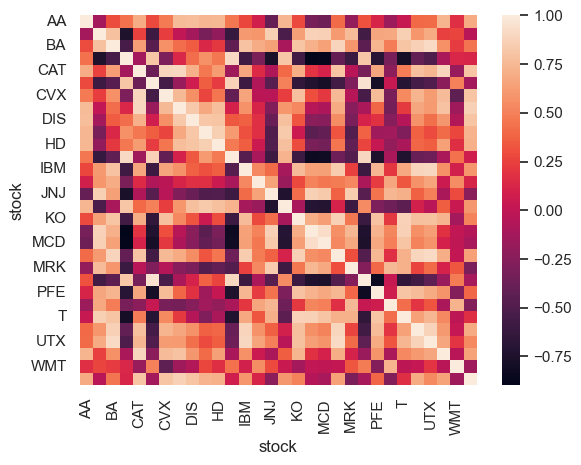

In [43]:
sns.heatmap(corr_data)

In [101]:
# 相関係数が1のものを除く
corr_data2 = corr_data[corr_data < corr_data.max()]

# ある行の最大値を取得
# print(corr_data2.max())
# 最大値の列名を取得
# print(corr_data2.idxmax())

# 最大値とその列名を組み合わせる
corr_data3 = pd.concat([corr_data2.idxmax(), corr_data2.max()], axis=1)
print(corr_data3)
print()

# 列名1の最大値とその列名を取得する。
max_value = corr_data3[1].max()
max_index = corr_data3[1].idxmax()
print(max_value)
max_index_pair = corr_data3.loc[max_index]

print()
max_index_pair
# print('Max', corr_data3.max(), corr_data3.idxmax(), )


          0         1
stock                
AA      DIS  0.772470
AXP    KRFT  0.873510
BA      UTX  0.916338
BAC     HPQ  0.905817
CAT      DD  0.902856
CSCO   MSFT  0.953722
CVX     CAT  0.889416
DD      CAT  0.902856
DIS      DD  0.826926
GE       HD  0.858207
HD       GE  0.858207
HPQ     BAC  0.905817
IBM     UTX  0.897552
INTC     BA  0.691094
JNJ    KRFT  0.861288
JPM      GE  0.830451
KO        T  0.868995
KRFT    MCD  0.929921
MCD    KRFT  0.929921
MMM     UTX  0.913696
MRK     JNJ  0.844027
MSFT   CSCO  0.953722
PFE       T  0.806544
PG      MRK  0.749713
T        KO  0.868995
TRV     MMM  0.891726
UTX      BA  0.916338
VZ      CAT  0.890315
WMT      PG  0.723706
XOM      DD  0.863511

0.9537216645891365



0        MSFT
1    0.953722
Name: CSCO, dtype: object

In [105]:
data_close

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,16.42,44.36,69.38,14.25,93.73,20.97,91.19,49.76,39.45,18.43,...,37.35,28.60,18.34,64.50,28.85,53.33,79.08,35.93,54.08,75.59
2011-01-14,15.97,46.25,70.07,15.25,94.01,21.21,92.83,49.80,39.29,18.82,...,34.23,28.30,18.34,65.53,28.43,54.63,79.08,35.46,54.81,77.84
2011-01-21,15.79,46.00,71.68,14.25,92.75,20.72,93.78,48.35,39.74,19.74,...,33.90,28.02,18.36,65.91,28.33,55.00,80.20,34.95,55.73,78.98
2011-01-28,16.13,43.86,69.23,13.60,95.68,20.93,93.37,50.29,38.85,20.20,...,33.07,27.75,18.15,64.20,27.49,55.81,81.43,35.63,56.70,78.99
2011-02-04,17.14,43.82,71.38,14.29,99.59,22.05,97.11,52.53,40.71,20.56,...,32.89,27.77,19.30,63.61,27.97,57.41,82.52,36.31,56.03,83.28
2011-02-11,17.37,46.75,72.14,14.77,103.54,18.70,96.45,54.58,43.41,21.33,...,33.07,27.25,18.83,64.73,28.47,58.99,85.20,36.39,55.69,82.82
2011-02-18,17.28,45.53,73.04,14.75,105.86,18.85,98.72,55.98,43.56,21.44,...,32.85,27.06,19.19,64.30,28.57,60.92,85.01,36.62,55.38,84.50
2011-02-25,16.68,43.53,72.30,14.20,102.00,18.64,102.10,54.07,42.95,20.82,...,32.19,26.55,18.86,62.84,28.13,59.60,83.37,35.97,51.75,85.34
2011-03-04,16.58,43.72,71.80,14.12,103.04,18.40,103.75,53.87,43.55,20.37,...,33.06,25.95,19.66,62.03,27.92,59.18,82.86,36.08,52.07,85.08


stock        CSCO   MSFT
date                    
2011-01-07  20.97  28.60
2011-01-14  21.21  28.30
2011-01-21  20.72  28.02
2011-01-28  20.93  27.75
2011-02-04  22.05  27.77
2011-02-11  18.70  27.25
2011-02-18  18.85  27.06
2011-02-25  18.64  26.55
2011-03-04  18.40  25.95
2011-03-11  17.95  25.68
2011-03-18  17.14  24.80
2011-03-25  17.28  25.62
2011-04-01  17.04  25.48
2011-04-08  17.65  26.07
2011-04-15  17.03  25.37
2011-04-21  16.94  25.52
2011-04-29  17.52  25.92
2011-05-06  17.56  25.87
2011-05-13  16.88  25.03
2011-05-20  16.53  24.49
2011-05-27  16.46  24.76
2011-06-03  16.01  23.90
2011-06-10  15.12  23.70
2011-06-17  14.97  24.26
2011-06-24  14.93  24.30


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

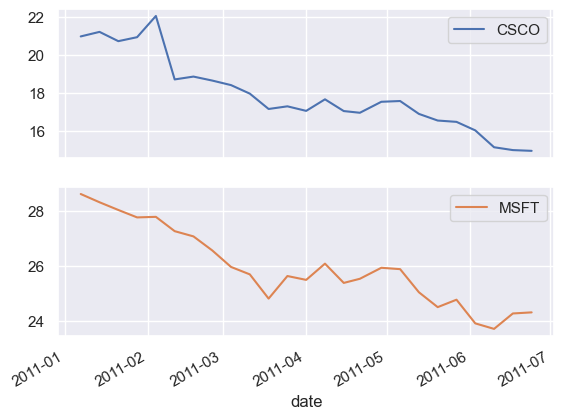

In [111]:
# CSCOとMSFTの行のみを抜き出して、グラフを作成
data_close_subsets = data_close[['CSCO', 'MSFT']]
print(data_close_subsets)
data_close_subsets.plot(subplots=True)

In [121]:
# 6
data_close.rolling(window=5).mean().head(10)

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-04,16.290,44.858,70.348,14.328,95.152,21.176,93.656,50.146,39.608,19.550,...,34.288,28.088,18.498,64.750,28.214,55.236,80.462,35.656,55.470,78.936
2011-02-11,16.480,45.336,70.900,14.432,97.114,20.722,94.708,51.110,40.400,20.130,...,33.432,27.818,18.596,64.796,28.138,56.368,81.686,35.748,55.792,80.382
2011-02-18,16.742,45.192,71.494,14.332,99.484,20.250,95.886,52.346,41.254,20.654,...,33.156,27.570,18.766,64.550,28.166,57.626,82.872,35.980,55.906,81.714
2011-02-25,16.920,44.698,71.618,14.322,101.334,19.834,97.550,53.490,41.896,20.870,...,32.814,27.276,18.866,63.936,28.126,58.546,83.506,36.184,55.110,82.986
2011-03-04,17.010,44.670,72.132,14.426,102.806,19.328,99.626,54.206,42.836,20.904,...,32.812,26.916,19.168,63.502,28.212,59.220,83.792,36.274,54.184,84.204


max CSCO
min KO
stock           CSCO        KO
date                          
2011-01-07       NaN       NaN
2011-01-14  0.011380  0.003332
2011-01-21 -0.023373 -0.005719
2011-01-28  0.010084 -0.008961
2011-02-04  0.052129  0.005610
2011-02-11 -0.164789  0.016016
2011-02-18  0.007989  0.015298
2011-02-25 -0.011203 -0.003725
2011-03-04 -0.012959  0.013898
2011-03-11 -0.024761 -0.006153
2011-03-18 -0.046175 -0.033098
2011-03-25  0.008135  0.039405
2011-04-01 -0.013986  0.030205
2011-04-08  0.035172  0.000744
2011-04-15 -0.035759  0.010940
2011-04-21 -0.005299 -0.001913
2011-04-29  0.033665 -0.006207
2011-05-06  0.002281 -0.008336
2011-05-13 -0.039494  0.018952
2011-05-20 -0.020953  0.001758
2011-05-27 -0.004244 -0.026557
2011-06-03 -0.027720 -0.014844
2011-06-10 -0.057195 -0.002139
2011-06-17 -0.009970  0.003511
2011-06-24 -0.002676 -0.010571


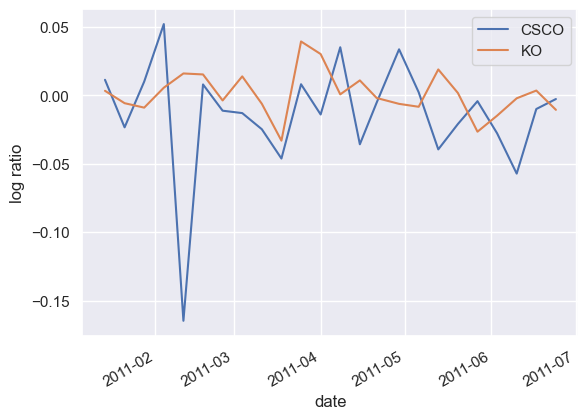

In [153]:
# 7
log_ratio_stock_close = np.log(data_close / data_close.shift(1))
# print(log_ratio_stock_close)
max_std = log_ratio_stock_close.std().idxmax()
min_std = log_ratio_stock_close.std().idxmin()
print('max', max_std)
print('min', min_std)

print(log_ratio_stock_close[[max_std, min_std]])
log_ratio_stock_close[max_std].plot()
log_ratio_stock_close[min_std].plot()
plt.ylabel('log ratio')
plt.legend()